# Задача 1

# Задача 2

In [362]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

from scipy import stats

warnings.filterwarnings('ignore')

sns.set(style="darkgrid", font_scale=1.4)
plt.style.use("dark_background")
sns.set_palette(sns.color_palette("Paired"))

In [363]:
data = pd.read_excel('hw12t2.xls', header=None)
data.shape

(100, 1)

In [364]:
n = 80
k = 10
train = data[0][:n]
test = data[0][n:]

In [365]:
test

80   -0.016192
81    0.042449
82    0.040093
83    0.062566
84    0.023612
85    0.012729
86   -0.010468
87    0.050517
88   -0.047339
89   -0.020591
90   -0.024443
91    0.008787
92    0.007512
93    0.085380
94    0.087779
95   -0.020869
96   -0.001619
97    0.004892
98    0.027721
99    0.017981
Name: 0, dtype: float64

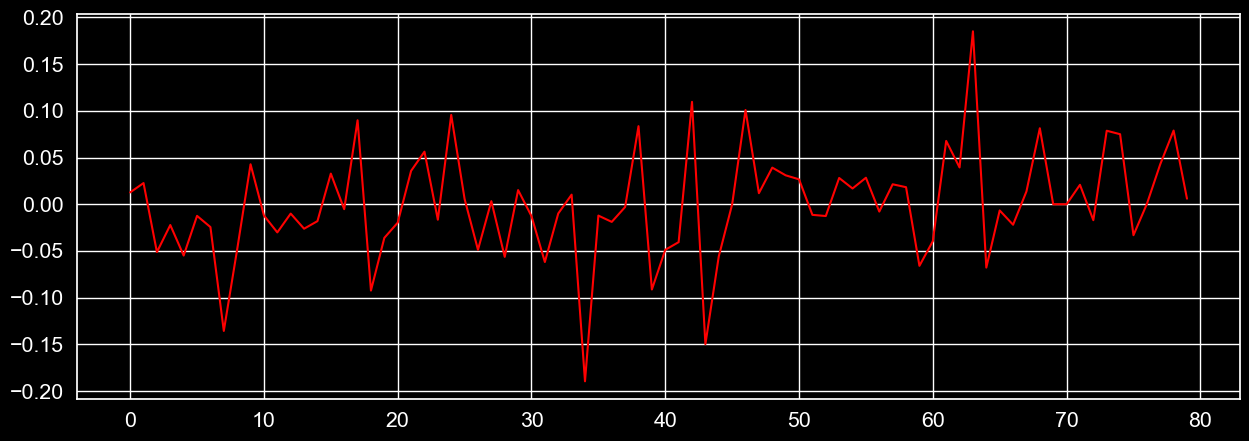

In [366]:
plt.figure(figsize=(15, 5))
train.plot(color='red');

In [367]:
print("Критерий Дики-Фуллера для ряда: pvalue =",
      sm.tsa.stattools.adfuller(train)[1])

Критерий Дики-Фуллера для ряда: pvalue = 1.7938385455013005e-14


Гипотеза о нестационарности отвергается (на любом разумном уровне значимости например $\alpha=0.01$)

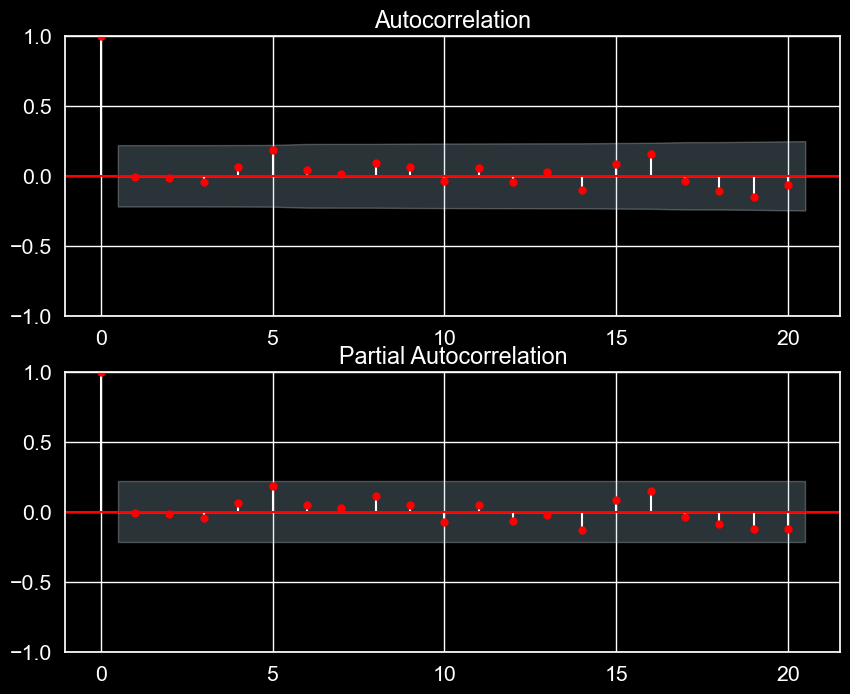

In [368]:
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(10,8)) 

sm.graphics.tsa.plot_acf(train, ax=ax1, color='red')
sm.graphics.tsa.plot_pacf(train, ax=ax2, color='red')

plt.show()

In [369]:
from pmdarima import auto_arima
model = auto_arima(train)
model.aic   

<bound method ARIMA.aic of ARIMA(order=(3, 1, 1), scoring_args={}, suppress_warnings=True)>

In [370]:
pred = model.predict(n_periods=2*k)

In [371]:
pred

80    0.020896
81    0.022223
82    0.031395
83    0.029198
84    0.029288
85    0.029152
86    0.030354
87    0.031129
88    0.031853
89    0.032443
90    0.033109
91    0.033787
92    0.034474
93    0.035149
94    0.035823
95    0.036497
96    0.037172
97    0.037848
98    0.038523
99    0.039198
dtype: float64

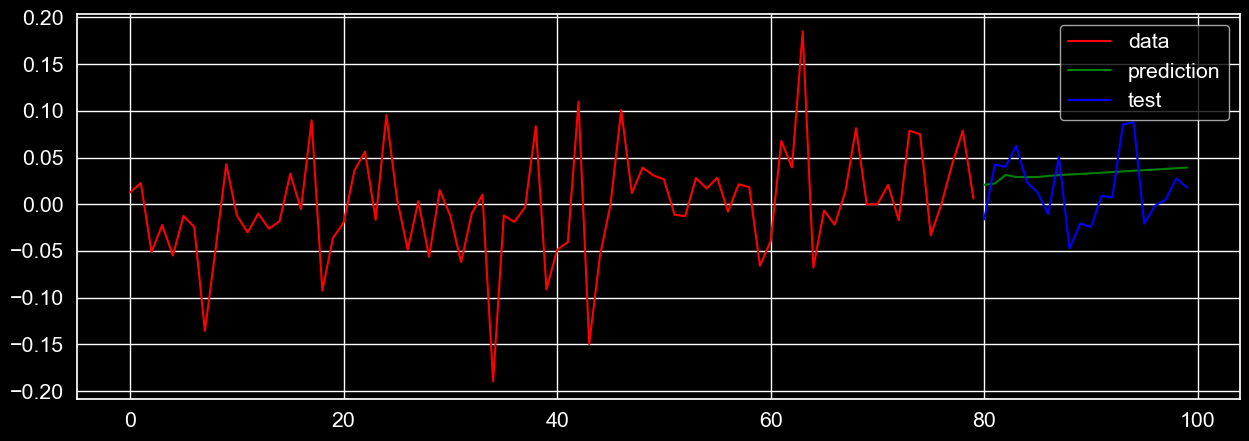

In [372]:
plt.figure(figsize=(15, 5))
plt.plot(train, color='red', label='data')
plt.plot(pred, color='green', label='prediction')
plt.plot(test, color='blue', label='test')
plt.legend(loc='best');

# Задача 3

In [373]:
data = pd.read_csv('hw12t3_train.csv')
data.iloc[:, 1:]

,y
0,2.186541
1,4.112926
2,2.342754
3,0.886390
4,1.538709
...,...
295,6.050681
296,6.787155
297,5.453304
298,5.090474


In [374]:
n = 260
k = 20
train = data['y'][:n]
test = data['y'][n:]

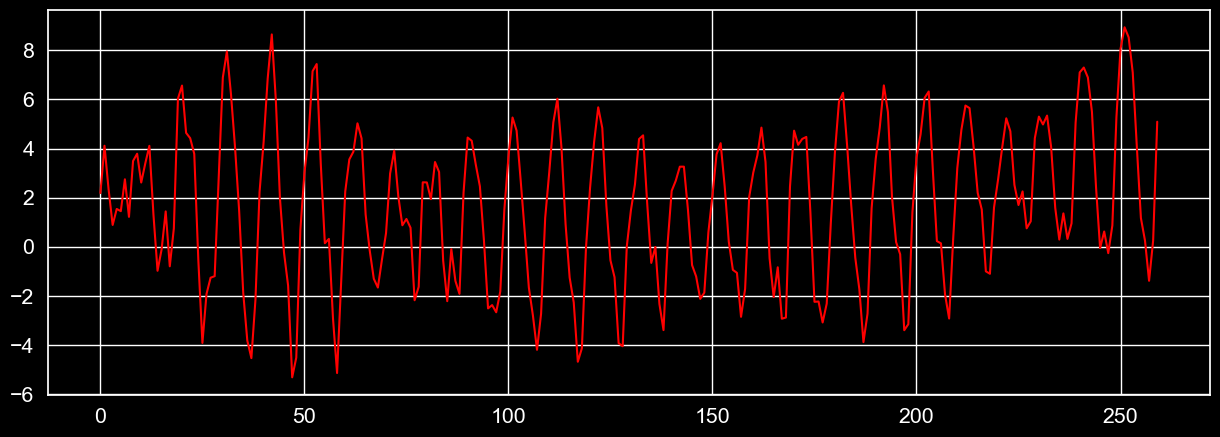

In [375]:
plt.figure(figsize=(15, 5))
train.plot(color='red');

In [387]:
print("Критерий Дики-Фуллера для ряда: pvalue =",
      sm.tsa.stattools.adfuller(train)[1])

Критерий Дики-Фуллера для ряда: pvalue = 1.0


Гипотеза о нестационарности не отвергается (на любом разумном уровне значимости например $\alpha=0.05$)

### 2. Стабилизация дисперсии

In [377]:
m = min(data['y'])
delta = - m + 1e-5

In [378]:
d, lmbd = stats.boxcox(data['y'] + delta)
d  = d - delta
train_box = d[:n]
test_box = d[n:]

In [379]:
print("Оптимальный параметр преобразования Бокса-Кокса: ", lmbd)

Оптимальный параметр преобразования Бокса-Кокса:  0.7545022457439216


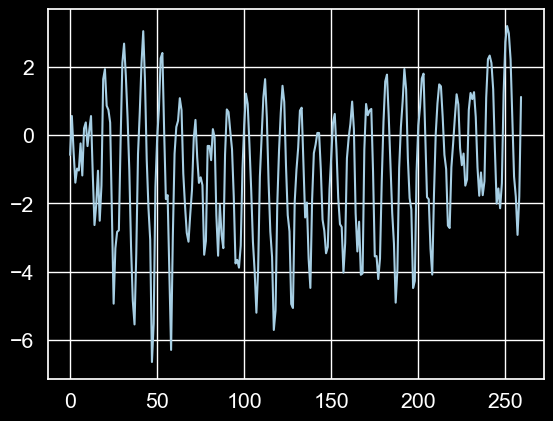

In [380]:
plt.plot(train_box);

In [388]:
print("Критерий Дики-Фуллера для ряда: pvalue =",
      sm.tsa.stattools.adfuller(train_box)[1])

Критерий Дики-Фуллера для ряда: pvalue = 1.0


In [389]:
from pmdarima import auto_arima
model = auto_arima(train)
model.aic

<bound method ARIMA.aic of ARIMA(order=(5, 0, 3), scoring_args={}, suppress_warnings=True)>

In [390]:
pred = model.predict(n_periods=k)

In [391]:
pred

260    5.953084
261    5.400201
262    5.935088
263    3.900846
264   -0.240780
265   -2.044708
266   -1.708136
267   -1.734840
268   -0.699259
269    2.348533
270    4.565218
271    4.703172
272    4.471924
273    3.848296
274    1.754024
275   -0.411120
276   -1.010768
277   -0.772922
278   -0.289865
279    1.120883
dtype: float64

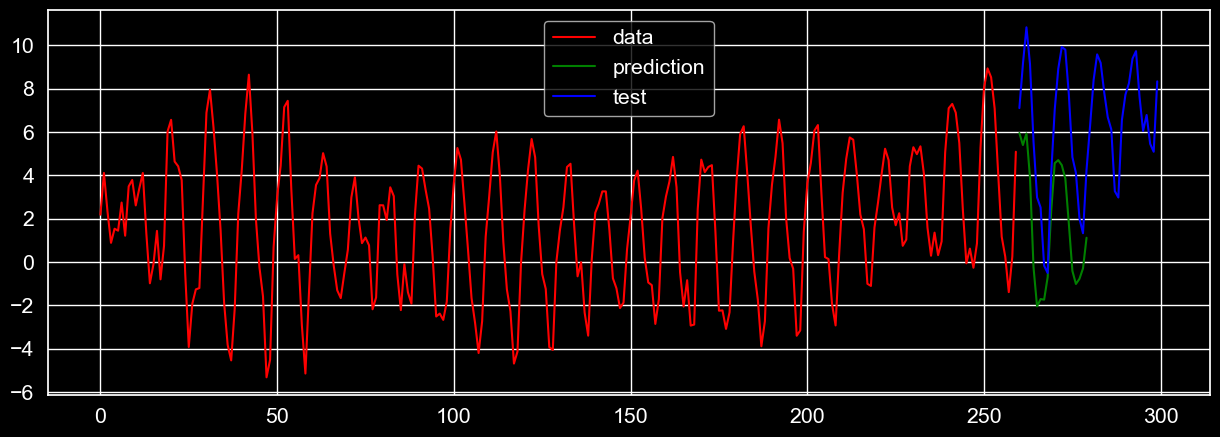

In [392]:
plt.figure(figsize=(15, 5))
plt.plot(train, color='red', label='data')
plt.plot(pred, color='green', label='prediction')
plt.plot(test, color='blue', label='test')
plt.legend(loc='best');

# Задача 4

In [386]:
data = pd.read_excel('hw12t4_train.xlsx')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600000,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300000,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900000,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150000,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,2005-03-20,12:00:00,1.6,1083.00,-200,4.298613,727.00,203.2,762.75,129.8,1134.75,636.00,18.600000,42.599999,0.903979
8995,2005-03-20,13:00:00,1.2,1063.00,-200,3.423299,677.75,163.3,795.75,108.5,1106.75,521.75,21.525000,35.025000,0.888630
8996,2005-03-20,14:00:00,0.9,988.25,-200,2.211584,599.50,110.4,912.00,82.2,1032.75,415.25,21.349999,35.550000,0.892449
8997,2005-03-20,15:00:00,0.9,1059.75,-200,3.563986,686.00,107.3,829.50,72.6,1109.75,444.75,23.150000,32.074999,0.897336


# Задача 5